Simple KF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def get_volt():
    """Measure voltage."""
    v = np.random.normal(0, 2)   # v: measurement noise.
    volt_true = 14.4             # volt_true: True voltage [V].
    z_volt_meas = volt_true + v  # z_volt_meas: Measured Voltage [V] (observable).
    return z_volt_meas

In [3]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q   #전치 왜 안함?

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)   #전치 왜 안함?2

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)   #

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [4]:
# Input parameters.
time_end = 10
dt = 0.2

In [5]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation.
x_0 = 12  # 14 for book.
P_0 = 6

In [6]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

In [7]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

Text(0, 0.5, 'Voltage [V]')

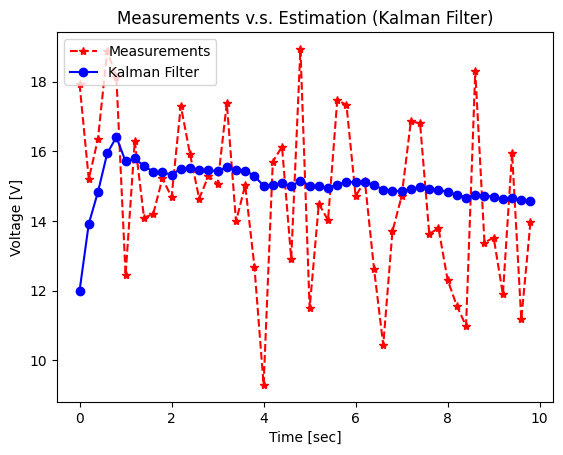

In [8]:
plt.plot(time, volt_meas_save, 'r*--', label='Measurements')
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('Measurements v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')


Simple KF2(P,K값 가시화)

In [9]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable.
       Return Kalman Gain for Drawing.
    """
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P, K

In [10]:
# Input parameters.
time_end = 10
dt = 0.2

In [11]:
# Initialization for system model.
A = 1
H = 1
Q = 0
R = 4
# Initialization for estimation.
x_0 = 12  # 14 for book.
P_0 = 6
K_0 = 1

In [12]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)
P_save = np.zeros(n_samples)
K_save = np.zeros(n_samples)

In [13]:
x_esti, P, K = None, None, None
for i in range(n_samples):
    z_meas = get_volt()
    if i == 0:
        x_esti, P, K = x_0, P_0, K_0
    else:
        x_esti, P, K = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
    P_save[i] = P
    K_save[i] = K

Text(0, 0.5, 'Kalman Gain (K)')

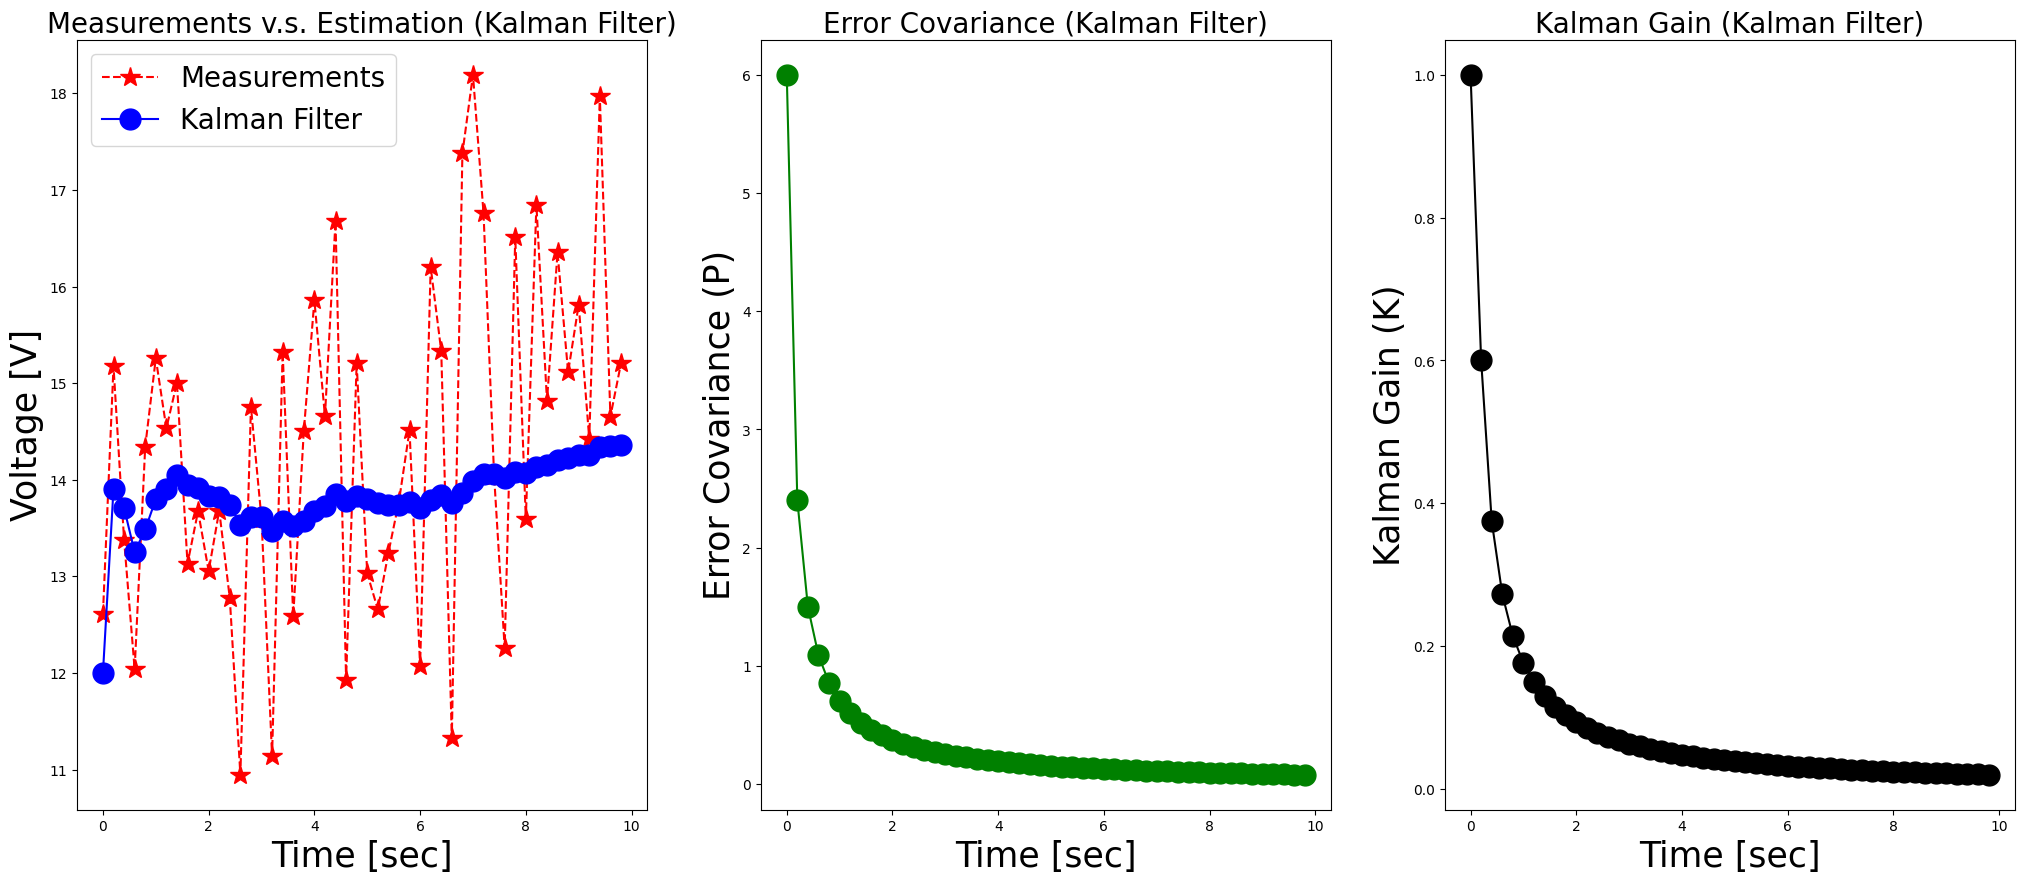

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

plt.subplot(1, 3, 1)
plt.plot(time, volt_meas_save, 'r*--', label='Measurements', markersize=15)
plt.plot(time, volt_esti_save, 'bo-', label='Kalman Filter', markersize=15)
plt.legend(loc='upper left', fontsize=20)
plt.title('Measurements v.s. Estimation (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Voltage [V]', fontsize=25)

plt.subplot(1, 3, 2)
plt.plot(time, P_save, 'go-', markersize=15)
plt.title('Error Covariance (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Error Covariance (P)', fontsize=25)

plt.subplot(1, 3, 3)
plt.plot(time, K_save, 'ko-', markersize=15)
plt.title('Kalman Gain (Kalman Filter)', fontsize=20)
plt.xlabel('Time [sec]', fontsize=25)
plt.ylabel('Kalman Gain (K)', fontsize=25)

Pos2Vel_KF

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

np.random.seed(0)

In [16]:
def get_pos_vel(itime, pos_true):
    """Return Measured Position, True Velocity and True Position."""
    w = np.random.normal(0, np.sqrt(10))      # w: system noise.
    v = np.random.normal(0, np.sqrt(10))      # v: measurement noise.


    vel_true = 80 + w                         # nominal velocity = 80 [m/s].
    if itime == 0:
        pos_true = pos_true
    else:
        pos_true = pos_true + vel_true * dt
    z_pos_meas = pos_true + v                 # z_pos_meas: measured position (observable)
    return z_pos_meas, vel_true, pos_true

In [17]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm."""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q

    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation.
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred

    return x_esti, P

In [18]:
# Input parameters.
time_end = 4
dt= 0.1

In [30]:
# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])

# Initialization for estimation.
x_0 = np.array([0, 20])  # position and velocity
P_0 = 5 * np.eye(2)

In [24]:
time = np.arange(0, time_end, dt)
n_samples = len(time)
pos_meas_save = np.zeros(n_samples)
vel_true_save = np.zeros(n_samples)
pos_esti_save = np.zeros(n_samples)
vel_esti_save = np.zeros(n_samples)

In [31]:
pos_true = 0
x_esti, P = None, None
for i in range(n_samples):
    z_meas, vel_true, pos_true = get_pos_vel(i, pos_true)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    pos_meas_save[i] = z_meas
    vel_true_save[i] = vel_true
    pos_esti_save[i] = x_esti[0]
    vel_esti_save[i] = x_esti[1]

Text(0, 0.5, 'Velocity [m/s]')

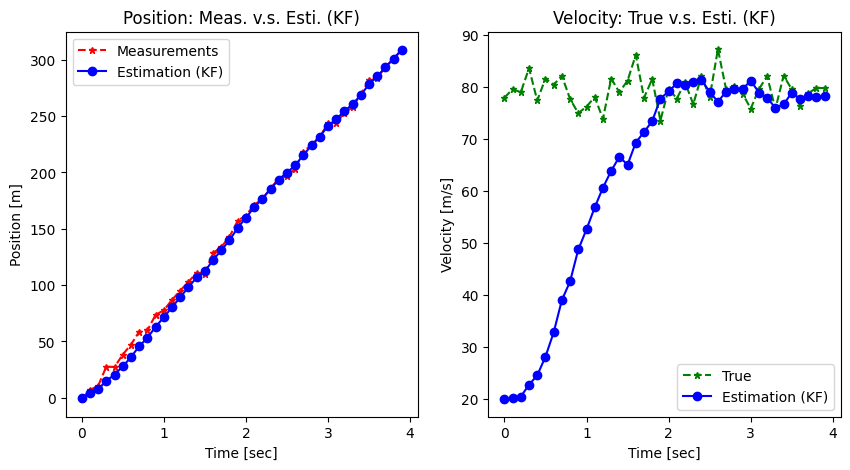

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, pos_meas_save, 'r*--', label='Measurements', markersize=5)
plt.plot(time, pos_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

plt.subplot(1, 2, 2)
plt.plot(time, vel_true_save, 'g*--', label='True', markersize=5)
plt.plot(time, vel_esti_save, 'bo-', label='Estimation (KF)')
plt.legend(loc='lower right')
plt.title('Velocity: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')